<a href="https://colab.research.google.com/github/Arunapozhath/PYTORCH_TUTORIAL/blob/add/NEURAL_NETWORKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***BASIC NEURAL NETWORK MODEL***

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [ ]:
#a class model that inherites the module is created here
class Model(nn.Module):
    #we have an input layer that has 4 features of the flowers
    #hidden layer 1  h1 has some neurons and then hidden layer h2
    #output layer that tells us the class of flowers we generally have 3 classes
    def __init__ (self,in_features = 4 ,h1 = 8 ,h2 = 9 , out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    def forward(self ,x):
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.out(x)

        return x

In [ ]:
#pick a manual seed for randomization
torch.manual_seed(41)
#create an instance of model
model = Model()


# ***LOAD DATA AND TRAIN NEURAL NETWORK MODEL***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
url = sns.load_dataset('iris')
my_df = pd.DataFrame(url)
my_df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#change last columns from strings to integers
my_df.species.replace({'setosa':0.0,'versicolor':1.0,'virginica':2.0},inplace = True)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#train test split  set x , y
x = my_df.drop('species',axis = 1)
y = my_df['species']

In [ ]:
#convert these to numpy arrays
x = x.values
y = y.values

In [ ]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 41)

In [ ]:
#converting x features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)


In [ ]:
#converting y features in to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#set the criterion of model to measure the error , how far off the predictions are from the data
Criterion = nn.CrossEntropyLoss()

# choose adam optimizer , lr = learning rate (if error doenst go down after a bunch of interations (epochs, we lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01) #lower the lr ie learning rate more time the model needs to train


In [ ]:
model.parameters()

<generator object Module.parameters at 0x7f5004467df0>

In [ ]:
#train our model
#epochs (one run through all the training data in our network)
epochs = 200
losses = []
for i in range(epochs):
    i+=1 #to get prediction
    y_pred = model.forward(x_train) #get predicted results
    loss = Criterion(y_pred,y_train) #meaure the loss/error, gonna be high at first
    #here it shows predicted value vs the y_train
    losses.append(loss.detach().numpy()) #keeping track of losses

    #print every 10 epoch
    if i % 10 == 0:
        print(f'epoch : {i} , loss : {loss}')

    #doing back propogation now take error rate of forward propogation and
    #feed it back to the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



epoch : 10 , loss : 0.045722708106040955
epoch : 20 , loss : 0.0402444563806057
epoch : 30 , loss : 0.03629999980330467
epoch : 40 , loss : 0.03329410403966904
epoch : 50 , loss : 0.030740531161427498
epoch : 60 , loss : 0.028036411851644516
epoch : 70 , loss : 0.024922776967287064
epoch : 80 , loss : 0.021939542144536972
epoch : 90 , loss : 0.019508998841047287
epoch : 100 , loss : 0.017629452049732208
epoch : 110 , loss : 0.01613333448767662
epoch : 120 , loss : 0.014906318858265877
epoch : 130 , loss : 0.013852733187377453
epoch : 140 , loss : 0.012950707226991653
epoch : 150 , loss : 0.012280008755624294
epoch : 160 , loss : 0.011698024347424507
epoch : 170 , loss : 0.011002571322023869
epoch : 180 , loss : 0.010291415266692638
epoch : 190 , loss : 0.009793411009013653
epoch : 200 , loss : 0.00948785524815321


Text(0.5, 0, 'Epoch')

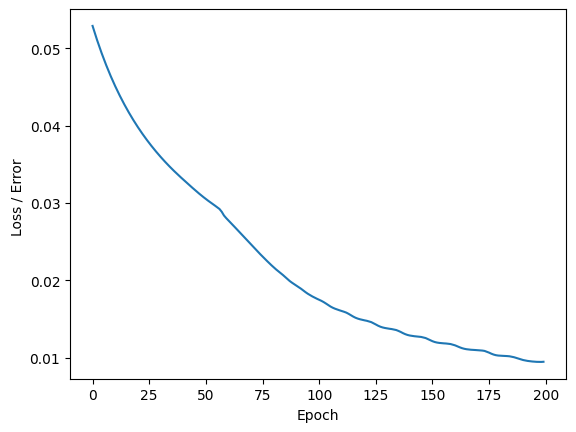

In [ ]:
#graph it out
plt.plot(range(epochs),losses)
plt.ylabel('Loss / Error ')
plt.xlabel('Epoch')

# ***VALIDATE OUR MODEL AND EVALUATE TEST DATA SET ON NETWORK***